In [29]:
import os
os.chdir(r'C:\Users\kikik\Desktop\3.2\data analytic')
os.getcwd()

'C:\\Users\\kikik\\Desktop\\3.2\\data analytic'

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [31]:
df=pd.read_csv('adult.csv')

# 1. Exploring dataset

## - Give summary statistics of Adult Dataset

In [32]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


##  - Use visualization tools to explore Adult Dataset

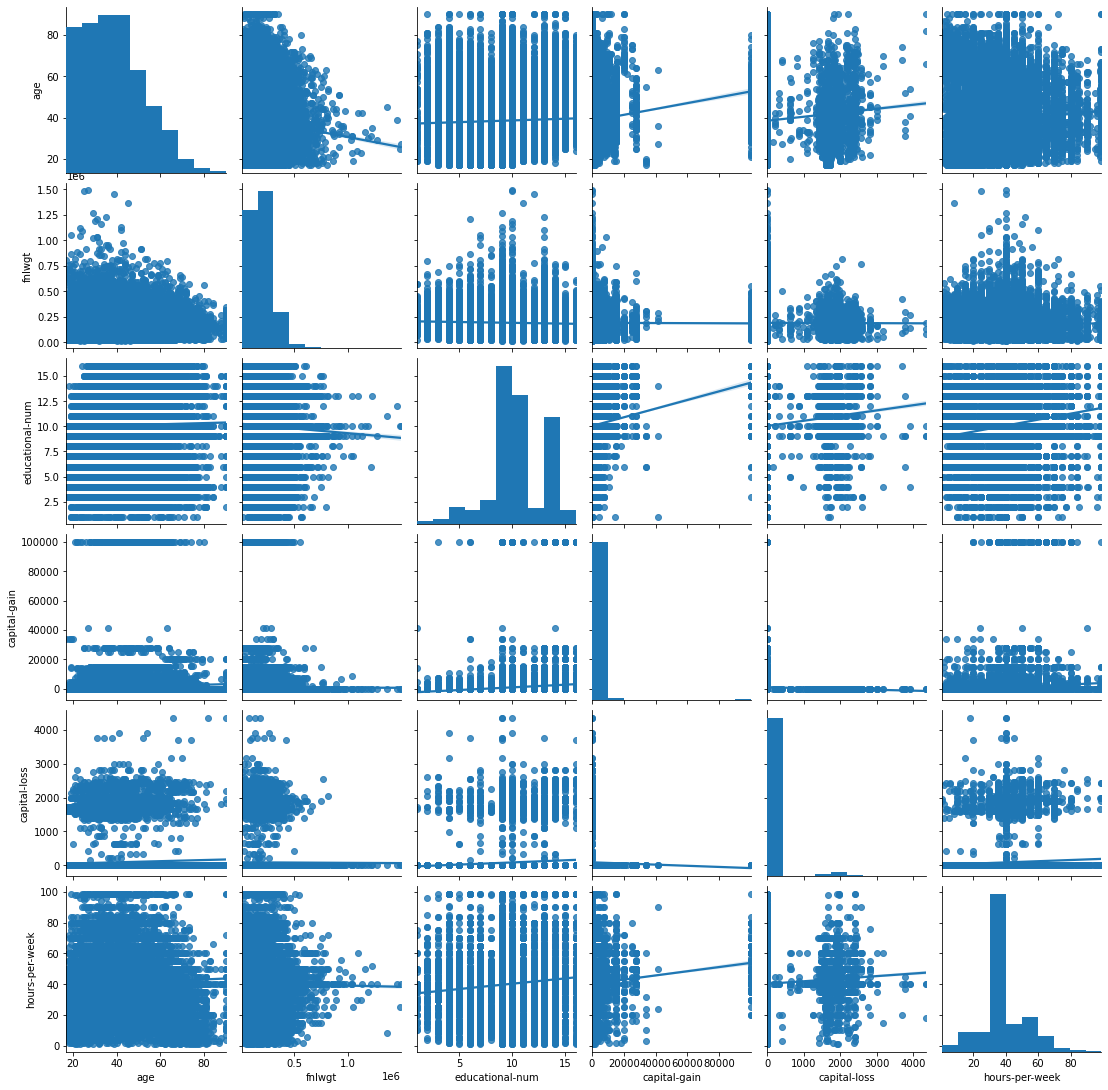

In [33]:
graph = sns.pairplot(df, kind="reg")

# 2. Processing missing values and/or outliers

## - Explain how you handle the missing of categorical or/and numerical variables?

## Categorical

In [34]:
df.replace("?", "Missing", inplace=True)

## Numerical

In [35]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
missing_values = df[numerical_features].isnull()
mean = df[numerical_features].mean()
df.replace(missing_values, mean, inplace=True)

## Check the result

In [36]:
print(df)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18       Missing  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

## - What are your strategies of handling missing values or/and outliers?

In [37]:
mean = df[numerical_features].mean()
threshold = 10
df[numerical_features] = np.where(
    (df[numerical_features] - mean).abs() > threshold * df[numerical_features].std(),
    mean, df[numerical_features])

## Check the result

In [38]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.895389e+05,10.078089,584.893278,87.240132,40.422382
std,13.710510,1.048725e+05,2.570973,2530.549506,401.613563,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.375962e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.226583e+06,16.000000,41310.000000,3900.000000,99.000000


# 3. Processing categorical and/or numerical data

## - Explain how you do transformation (categorical => numerical, or numerical => categorical

## categorical => numerical

In [39]:
df1 = df

In [40]:
categorical_features = [feature for feature in df1.columns if df1[feature].dtypes == 'O']
print('Number of categorical variables: ', len(categorical_features))
df1[categorical_features].head()

Number of categorical variables:  9


,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Missing,Some-college,Never-married,Missing,Own-child,White,Female,United-States,<=50K


In [41]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
encoded = onehot.fit_transform(df1[categorical_features])
df1_encoded = pd.DataFrame(encoded.toarray(), columns=onehot.get_feature_names(categorical_features))
df1 = pd.concat([df1, df1_encoded], axis=1)
df1.drop(categorical_features, axis=1, inplace=True)

## Check the result

In [42]:
print(df1)

        age    fnlwgt  educational-num  capital-gain  capital-loss  \
0      25.0  226802.0              7.0           0.0           0.0   
1      38.0   89814.0              9.0           0.0           0.0   
2      28.0  336951.0             12.0           0.0           0.0   
3      44.0  160323.0             10.0        7688.0           0.0   
4      18.0  103497.0             10.0           0.0           0.0   
...     ...       ...              ...           ...           ...   
48837  27.0  257302.0             12.0           0.0           0.0   
48838  40.0  154374.0              9.0           0.0           0.0   
48839  58.0  151910.0              9.0           0.0           0.0   
48840  22.0  201490.0              9.0           0.0           0.0   
48841  52.0  287927.0              9.0       15024.0           0.0   

       hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0                40.0                    0.0                  0.0   
1                50.0

# 4. Feature scaling

## - Explain how you scale the numerical features?


In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df2 = df

scaler = StandardScaler()
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])

scaler = MinMaxScaler()
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])

print(df2.head())

        age  workclass    fnlwgt     education  educational-num  \
0  0.109589    Private  0.176659          11th         0.400000   
1  0.287671    Private  0.063847       HS-grad         0.533333   
2  0.150685  Local-gov  0.267369    Assoc-acdm         0.733333   
3  0.369863    Private  0.121912  Some-college         0.600000   
4  0.013699    Missing  0.075115  Some-college         0.600000   

       marital-status         occupation relationship   race  gender  \
0       Never-married  Machine-op-inspct    Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing      Husband  White    Male   
2  Married-civ-spouse    Protective-serv      Husband  White    Male   
3  Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4       Never-married            Missing    Own-child  White  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0      0.000000           0.0        0.397959  United-States  <=50K  
1      0.000000         